# Lab 2: Temperature and Pressure

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
T0 = 23 + 273 # Initial temperature in kelvin
TF = 20 + 273 # Final temperature in kelvin

In [4]:
def get_data(filePath):
    data = np.loadtxt(filePath, delimiter=",", skiprows=1)
    pp = data[:, 1]
    return pp

# Exctract raw Phyphox data
allenRaw = get_data("Data/allen-data.csv")
joelRaw = get_data("Data/joel-data.csv")
justinRaw = get_data("Data/justin-data.csv")
timRaw = get_data("Data/tim-data.csv")


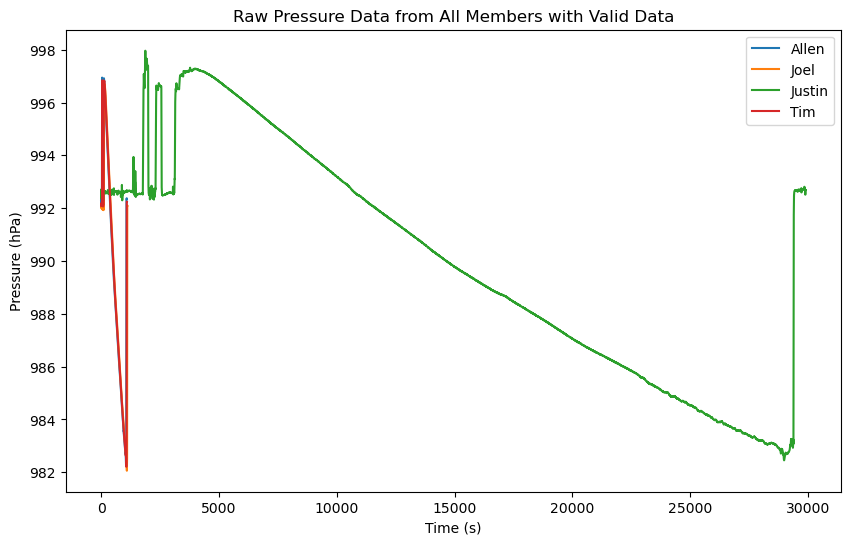

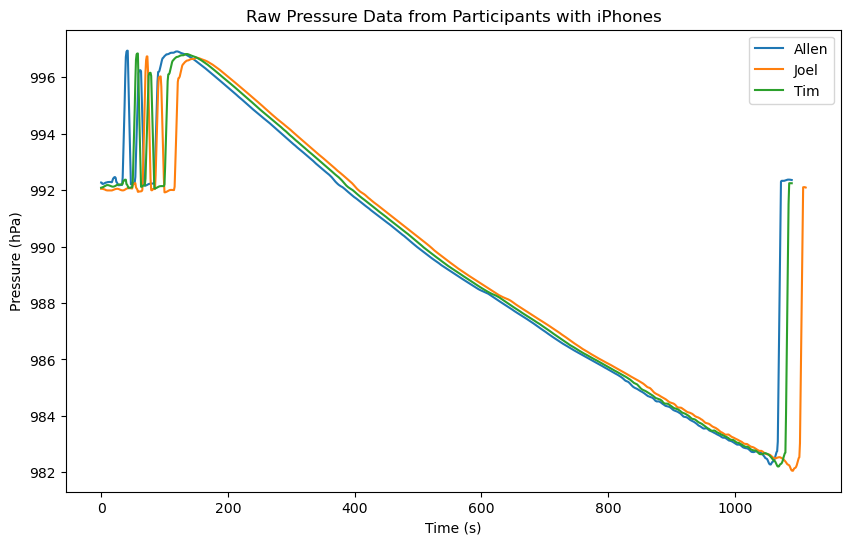

In [5]:
# Graph raw data to check for sample rates and size 
plt.figure(figsize=(10, 6))
plt.plot(allenRaw, label="Allen")
plt.plot(joelRaw, label="Joel")
plt.plot(justinRaw, label="Justin")
plt.plot(timRaw, label="Tim")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (hPa)")
plt.legend()
plt.title("Raw Pressure Data from All Members with Valid Data")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(allenRaw, label="Allen")
plt.plot(joelRaw, label="Joel")
plt.plot(timRaw, label="Tim")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (hPa)")
plt.legend()
plt.title("Raw Pressure Data from Participants with iPhones")
plt.show()

Allen's data starts at index: 119
Joel's data starts at index: 150
Tim's data starts at index: 134


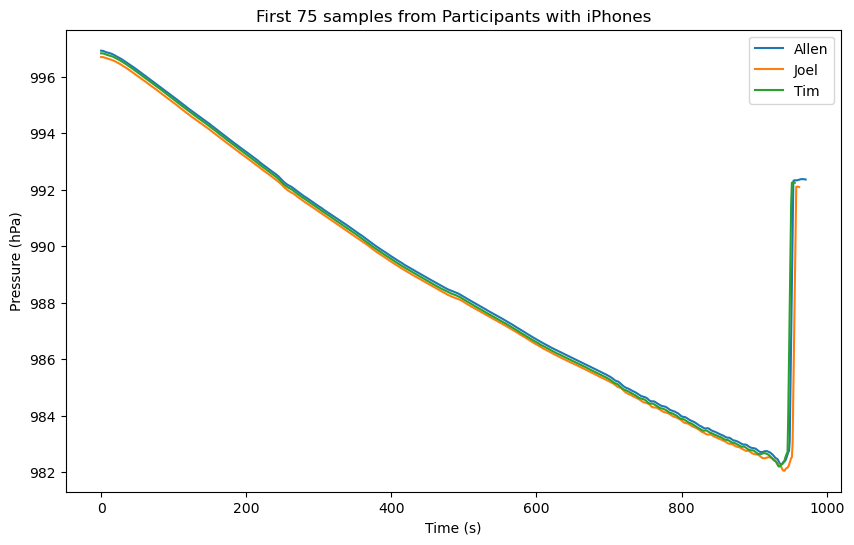

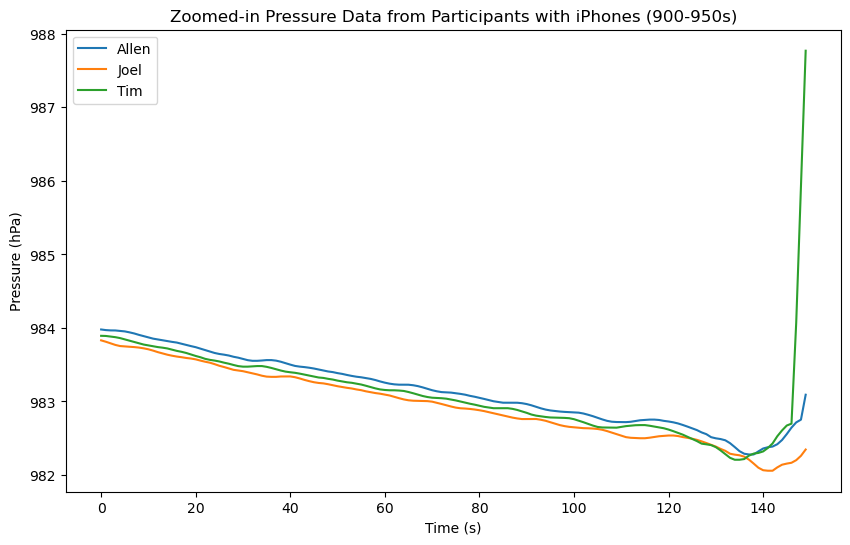

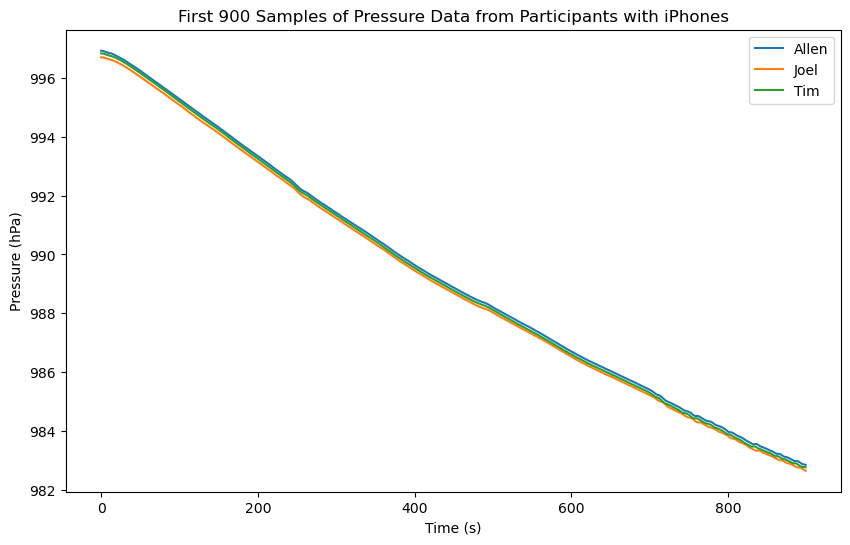

Allen's data length: 900
Joel's data length: 900
Tim's data length: 900
Allen's minimum pressure: 982.8546906
Joel's minimum pressure: 982.6541138
Tim's minimum pressure: 982.771759


In [6]:
# Cleaning up Data

sampleStartIndex = 75 # Index to start looking for the sample period, ignoring the first 100 samples

allenStartIndex = np.argmax(allenRaw[sampleStartIndex:]) + sampleStartIndex # Start index for Allen's data, ignoring the first 100 samples
timStartIndex = np.argmax(timRaw[sampleStartIndex:]) + sampleStartIndex # Start index for Tim's data, ignoring the first 100 samples
joelStartIndex = np.argmax(joelRaw[sampleStartIndex:]) + sampleStartIndex # Start index for Joel's data, ignoring the first 100 samples
print(f"Allen's data starts at index: {allenStartIndex}")
print(f"Joel's data starts at index: {joelStartIndex}")
print(f"Tim's data starts at index: {timStartIndex}")

allenCleaned = allenRaw[allenStartIndex:]
joelCleaned = joelRaw[joelStartIndex:]
timCleaned = timRaw[timStartIndex:]

plt.figure(figsize=(10, 6))
plt.plot(allenCleaned, label="Allen")
plt.plot(joelCleaned, label="Joel")
plt.plot(timCleaned, label="Tim")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (hPa)")
plt.legend()
plt.title(f"First {sampleStartIndex} samples from Participants with iPhones")
plt.show()

# Graphing from 800 - 935 to find end of smaple period
plt.figure(figsize=(10, 6))
plt.plot(allenCleaned[800:950], label="Allen")
plt.plot(joelCleaned[800:950], label="Joel")
plt.plot(timCleaned[800:950], label="Tim")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (hPa)")
plt.legend()
plt.title("Zoomed-in Pressure Data from Participants with iPhones (900-950s)")
plt.show()


allenCleaned = allenCleaned[:900]
joelCleaned = joelCleaned[:900 ]
timCleaned = timCleaned[:900]

# Plot 900 samples for each
plt.figure(figsize=(10, 6))
plt.plot(allenCleaned, label="Allen")
plt.plot(joelCleaned, label="Joel")
plt.plot(timCleaned, label="Tim")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (hPa)")
plt.legend()
plt.title("First 900 Samples of Pressure Data from Participants with iPhones")
plt.show()

print (f"Allen's data length: {len(allenCleaned)}")
print (f"Joel's data length: {len(joelCleaned)}")
print (f"Tim's data length: {len(timCleaned)}")

# Print the minimum pressure values for each participant
print(f"Allen's minimum pressure: {np.min(allenCleaned)}")
print(f"Joel's minimum pressure: {np.min(joelCleaned)}")
print(f"Tim's minimum pressure: {np.min(timCleaned)}")

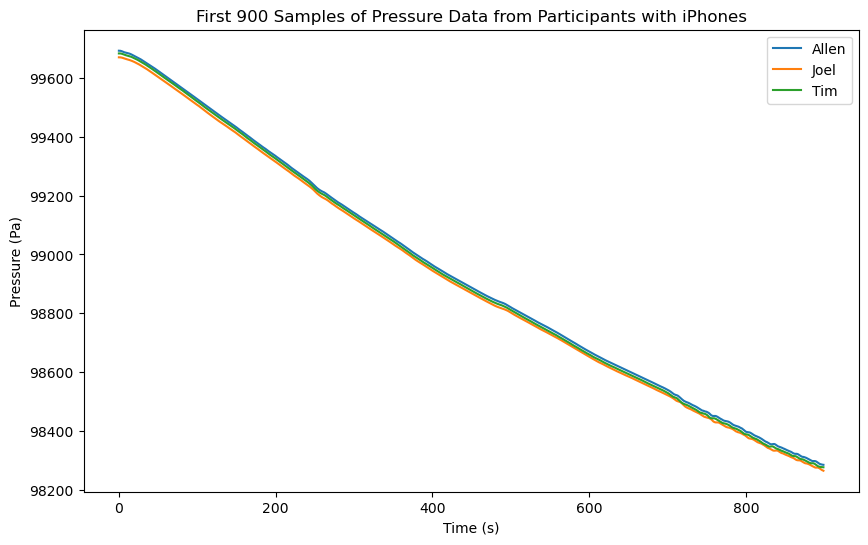

In [7]:
# Converting pressure from hPa to Pa
allenCleaned = allenCleaned * 100
joelCleaned = joelCleaned * 100
timCleaned = timCleaned * 100


plt.figure(figsize=(10, 6))
plt.plot(allenCleaned, label="Allen")
plt.plot(joelCleaned, label="Joel")
plt.plot(timCleaned, label="Tim")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (Pa)")
plt.legend()
plt.title("First 900 Samples of Pressure Data from Participants with iPhones")
plt.show()

In [8]:
# Physical Constants

# Total jar capacity in cubic meters (4200 mL = 0.0042 m^3)
V_jar = 0.0042 

# Total volume displaced by 6 phones + cases (estimated at 831 mL)
# Calculated from: (3x 124mL) + (2x 148mL) + 1x 163mL
V_phones = 0.000831 

# The actual volume occupied by the gas (V in PV=nRT)
V_gas = V_jar - V_phones # Result: 0.003369 m^3

# Ideal Gas Constant in SI units (J / (mol * K))
R = 8.314 

In [9]:
# Data Analysis

allenMean = np.mean(allenCleaned)
joelMean = np.mean(joelCleaned)
timMean = np.mean(timCleaned)

iPhoneMeans = [allenMean, joelMean, timMean]
iPhoneMean = np.mean(iPhoneMeans)

# Sample standard deviation
allenStdDev = np.std(allenCleaned, ddof=1) 
joelStdDev = np.std(joelCleaned, ddof=1) 
timStdDev = np.std(timCleaned, ddof=1) 

iPhonePropogation = np.sqrt((allenStdDev**2 + joelStdDev**2 + timStdDev**2)) 
print(f"Propogation for the iPhones is {round(iPhonePropogation, 2)} Pa")

Propogation for the iPhones is 721.42 Pa


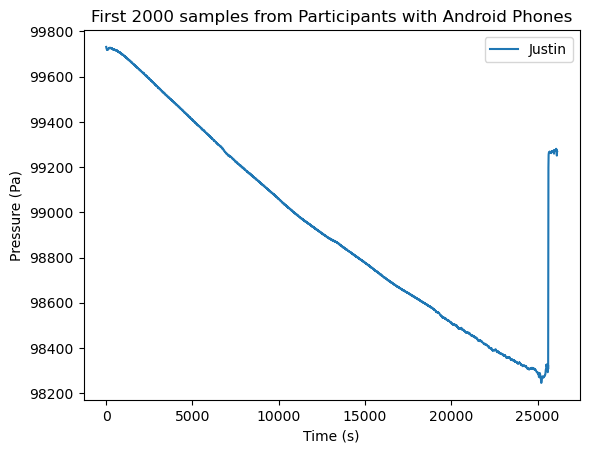

In [10]:
# Clean up Justin's Android data by finding the start of the sample period
sampleStartIndex = 2000 # Index to start looking for the sample period, ignoring the first 100 samples
justinStartIndex = np.argmax(justinRaw[sampleStartIndex:]) + sampleStartIndex
justinCleaned = justinRaw[justinStartIndex:] * 100 # Convert from hPa to Pa


plt.plot(justinCleaned, label="Justin")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (Pa)")
plt.legend()
plt.title(f"First {sampleStartIndex} samples from Participants with Android Phones")
plt.show()

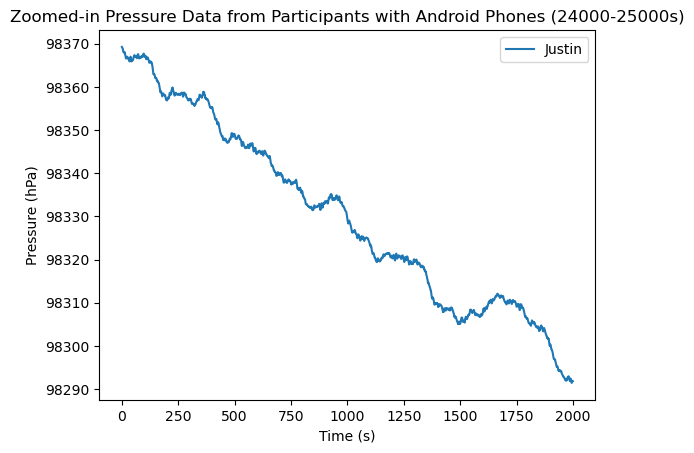

In [11]:
# zoom into 24000 - 25000 to find end of sample period
plt.plot(justinCleaned[23000:25000], label="Justin")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (hPa)")
plt.legend()
plt.title("Zoomed-in Pressure Data from Participants with Android Phones (24000-25000s)")
plt.show()

Justin's smaple size ends at t = 24500

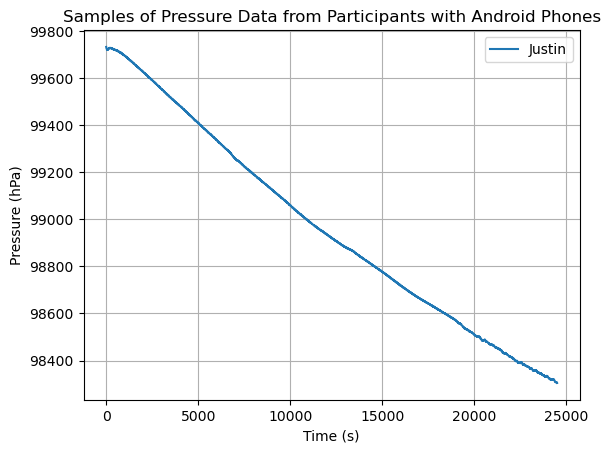

In [12]:
justinCleaned = justinCleaned[:24500] # Keep only the samples from 2000 to 24500, which is the sample period for Justin's data
plt.plot(justinCleaned, label="Justin")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (hPa)")
plt.legend()  
plt.grid()  
plt.title("Samples of Pressure Data from Participants with Android Phones")
plt.show()

Length of Justin's samples are 900


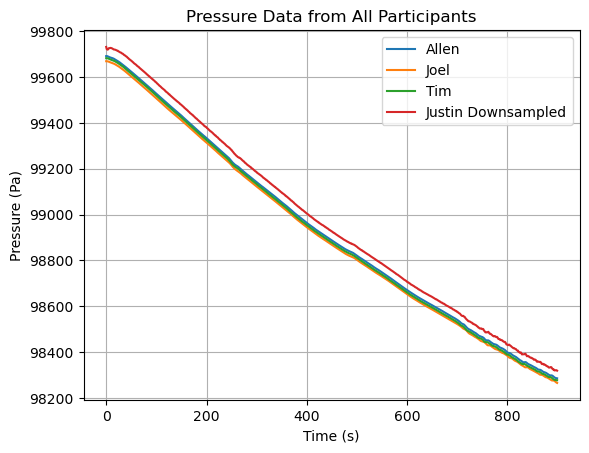

In [17]:
# Graph all the data by taking 900 samples for Justin's data to match the iPhones' sample size
samplePeriod = int(len(justinCleaned)/len(allenCleaned)) # Check the length of Justin's cleaned data to ensure it has at least 900 samples

justinDownsampled = justinCleaned[::samplePeriod]
justinDownsampled = justinDownsampled[:900] # Keep only the first 900 samples to match the iPhones' sample size
print(f"Length of Justin's samples are {len(justinDownsampled)}") # Check the length of the downsampled data to ensure it has 900 samples

plt.plot(allenCleaned, label="Allen")
plt.plot(joelCleaned, label="Joel")
plt.plot(timCleaned, label="Tim")
plt.plot(justinDownsampled, label="Justin Downsampled")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (Pa)")
plt.legend()
plt.grid()
plt.title("Pressure Data from All Participants")
plt.show()

With N = 900 samples, we can get the group standard deviaiton

In [14]:
# --- ANALYSIS CALCULATION ---

# If you have found your slope (m) from the P vs T graph:
# According to the board notes: n = (m * V) / R
# n_moles = (slope * V_gas) / R